In [11]:
import numpy as np  
import pandas as pd  
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense  
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.optimizers.schedules import ExponentialDecay
import pickle  
import torch
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor  
from sklearn.metrics import accuracy_score  
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
dataset = pd.read_excel('归一化.xlsx', sheet_name='Sheet1')
dataset.head()
b = dataset.loc[:, 'b']
d = dataset.loc[:, 'd']
ad = dataset.loc[:, 'a/d']
Asv = dataset.loc[:, 'Asv']
fc = dataset.loc[:, 'fc']
hf = dataset.loc[:, 'hf']
ntf = dataset.loc[:, 'ntf']
Ef = dataset.loc[:, 'Ef']
ffrp = dataset.loc[:, 'ffrp']
frpws = dataset.loc[:, 'frpws']
wfsf = dataset.loc[:, 'wf/sf']
X = np.zeros(shape=(2,11))
X[:, 0] = b
X[:, 1] = d
X[:, 2] = ad
X[:, 3] = Asv
X[:, 4] = fc
X[:, 5] = hf
X[:, 6] = ntf
X[:, 7] = Ef
X[:, 8] = ffrp
X[:, 9] = frpws
X[:, 10] = wfsf

# 创建名字数组，包含12个列名
names = np.array(['b', 'd', 'ad', 'Asv', 'fc', 'hf', 'ntf', 'Ef', 'ffrp', 'frpws', 'wfsf'])

print(X.shape)
  # 数据标准化  
scaler1 = MinMaxScaler() 
X = scaler1.fit_transform(X)  

(2, 11)


In [13]:
dataset = pd.read_excel('数据附录.xlsx', sheet_name='Sheet5')
dataset.head()
print(dataset.shape)

(283, 16)


In [14]:
b = dataset.loc[:, 'b']
d = dataset.loc[:, 'd']
ad = dataset.loc[:, 'a/d']
Asv = dataset.loc[:, 'Asv']
fc = dataset.loc[:, 'fc']
hf = dataset.loc[:, 'hf']
ntf = dataset.loc[:, 'ntf']
Ef = dataset.loc[:, 'Ef']
ffrp = dataset.loc[:, 'ffrp']
frpws = dataset.loc[:, 'frpws']
wfsf = dataset.loc[:, 'wf/sf']


In [15]:
X = np.zeros(shape=(283,11))
X[:, 0] = b
X[:, 1] = d
X[:, 2] = ad
X[:, 3] = Asv
X[:, 4] = fc
X[:, 5] = hf
X[:, 6] = ntf
X[:, 7] = Ef
X[:, 8] = ffrp
X[:, 9] = frpws
X[:, 10] = wfsf

# 创建名字数组，包含12个列名
names = np.array(['b', 'd', 'ad', 'Asv', 'fc', 'hf', 'ntf', 'Ef', 'ffrp', 'frpws', 'wfsf'])
print(X.shape)

(283, 11)


In [16]:
X=scaler1.transform(X)
print(X)

[[0.20833333 0.26397516 0.41233766 ... 0.625      0.         0.07608696]
 [0.20833333 0.26397516 0.41233766 ... 0.625      0.         0.27173913]
 [0.20833333 0.26397516 0.41233766 ... 0.625      0.         0.27173913]
 ...
 [0.83333333 0.37888199 0.63636364 ... 0.8372093  1.         1.        ]
 [0.83333333 0.37888199 0.63636364 ... 0.8372093  1.         0.45652174]
 [0.20833333 0.42546584 0.62987013 ... 0.8372093  1.         0.45652174]]


In [17]:
y = dataset.loc [:, 'V']

print(y.shape)

(283,)


In [18]:
print(X.shape)


(283, 11)


In [19]:
# 划分数据集为训练集和测试集  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  


In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from sklearn.model_selection import GridSearchCV, KFold
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

# 设置随机种子
np.random.seed(36)
tf.random.set_seed(42)

# 定义创建模型的函数
def create_model(learning_rate=0.01, decay_steps=200, decay_rate=0.95, 
                 hidden_units1=16, hidden_units2=8):
    lr_schedule = ExponentialDecay(
        learning_rate, decay_steps, decay_rate, staircase=True)
    
    model = Sequential()
    model.add(Dense(hidden_units1, input_dim=11, activation='relu'))
    model.add(Dense(hidden_units2, activation='relu'))
    model.add(Dense(1, activation='linear'))
    
    optimizer = Adam(learning_rate=lr_schedule)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# 创建Keras包装器
model = KerasRegressor(build_fn=create_model, verbose=0)

# 定义要搜索的参数网格
param_grid = {
    'epochs': [200, 400],
    'batch_size': [10, 20],
    'learning_rate': [0.01, 0.005],
    'decay_rate': [0.95, 0.9],
    'hidden_units1': [16, 24],
    'hidden_units2': [8, 12]
}

# 定义五折交叉验证
kfold = KFold(n_splits=5, shuffle=False)

# 执行网格搜索
grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=kfold,
    scoring='neg_mean_squared_error',
    n_jobs=1,
    verbose=2
)

grid_result = grid.fit(X_train, y_train)

# 输出最佳参数
print("最佳参数: %s" % grid_result.best_params_)

# 提取最佳参数
best_params = grid_result.best_params_


C:\Users\yang\AppData\Local\Temp\ipykernel_14644\2460393925.py:30: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)


Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END batch_size=10, decay_rate=0.95, epochs=200, hidden_units1=16, hidden_units2=8, learning_rate=0.01; total time=   2.6s
[CV] END batch_size=10, decay_rate=0.95, epochs=200, hidden_units1=16, hidden_units2=8, learning_rate=0.01; total time=   2.6s
[CV] END batch_size=10, decay_rate=0.95, epochs=200, hidden_units1=16, hidden_units2=8, learning_rate=0.01; total time=   2.5s
[CV] END batch_size=10, decay_rate=0.95, epochs=200, hidden_units1=16, hidden_units2=8, learning_rate=0.01; total time=   2.6s
[CV] END batch_size=10, decay_rate=0.95, epochs=200, hidden_units1=16, hidden_units2=8, learning_rate=0.01; total time=   2.5s
[CV] END batch_size=10, decay_rate=0.95, epochs=200, hidden_units1=16, hidden_units2=8, learning_rate=0.005; total time=   2.1s
[CV] END batch_size=10, decay_rate=0.95, epochs=200, hidden_units1=16, hidden_units2=8, learning_rate=0.005; total time=   2.3s
[CV] END batch_size=10, decay_rate=0.95, epochs

In [21]:
# 输出结果
print("最佳参数: %s，对应的MSE分数: %f" % (grid_result.best_params_, -grid_result.best_score_))

最佳参数: {'batch_size': 10, 'decay_rate': 0.95, 'epochs': 400, 'hidden_units1': 24, 'hidden_units2': 12, 'learning_rate': 0.01}，对应的MSE分数: 2755.681143


In [22]:

# 使用最佳参数创建最终模型
model = create_model(
    learning_rate=best_params['learning_rate'],
    decay_steps=200,  # 保持原始值，因为它没有在网格中搜索
    decay_rate=best_params['decay_rate'],
    hidden_units1=best_params['hidden_units1'],
    hidden_units2=best_params['hidden_units2']
)

# 使用最佳参数训练模型
model.fit(
    X_train, y_train,
    epochs=best_params['epochs'],
    batch_size=best_params['batch_size'],
    validation_split=0.2,
    shuffle=False
)


Epoch 1/400
18/18 [==============================] - 0s 5ms/step - loss: 36151.7344 - val_loss: 33286.1641
Epoch 2/400
18/18 [==============================] - 0s 2ms/step - loss: 28050.9141 - val_loss: 18737.4863
Epoch 3/400
18/18 [==============================] - 0s 2ms/step - loss: 10766.8408 - val_loss: 6198.3745
Epoch 4/400
18/18 [==============================] - 0s 2ms/step - loss: 6326.5854 - val_loss: 5927.2935
Epoch 5/400
18/18 [==============================] - 0s 2ms/step - loss: 5639.2002 - val_loss: 5684.4951
Epoch 6/400
18/18 [==============================] - 0s 2ms/step - loss: 5373.3325 - val_loss: 5486.4858
Epoch 7/400
18/18 [==============================] - 0s 1ms/step - loss: 5153.4575 - val_loss: 5278.7603
Epoch 8/400
18/18 [==============================] - 0s 2ms/step - loss: 4942.0654 - val_loss: 5097.2520
Epoch 9/400
18/18 [==============================] - 0s 2ms/step - loss: 4749.2202 - val_loss: 4920.2051
Epoch 10/400
18/18 [==============================

In [23]:
# 预测测试集  
y_pred1 = model.predict(X_train)  
y_pred2 = model.predict(X_test)  


# 使用reshape方法来改变形状  
y_pred1 = y_pred1.reshape(-1) 
y_pred2 = y_pred2.reshape(-1) 

def mape1(y_train, y_pred1):    
    return np.mean(np.abs((y_pred1 - y_train) / y_train))
def mape2(y_test, y_pred2):    
    return np.mean(np.abs((y_pred2 - y_test) / y_test))

mape1=mape1(y_train, y_pred1)
mape2=mape2(y_test, y_pred2)
  
# 计算测试集上的均方根误差（RMSE）作为性能指标  
rmse1 = np.sqrt(mean_squared_error(y_train, y_pred1))  
mae1 = mean_absolute_error(y_train, y_pred1)
r21 =r2_score(y_train, y_pred1)

rmse2 = np.sqrt(mean_squared_error(y_test, y_pred2))  
mae2 = mean_absolute_error(y_test, y_pred2)
r22 =r2_score(y_test, y_pred2)

print("ANN train:",'R2',r21,'RMSE',rmse1,'MAE',mae1,'MAPE',mape1)
print("ANN test:",'R2',r22,'RMSE',rmse2,'MAE',mae2,'MAPE',mape2)

2/2 [==============================] - 0s 3ms/step
ANN train: R2 0.7263308575154643 RMSE 45.988087247408764 MAE 34.58625175138491 MAPE 0.22932314553808833
ANN test: R2 0.634606043693658 RMSE 48.669805073062804 MAE 38.53447913989686 MAPE 0.24617027992380847


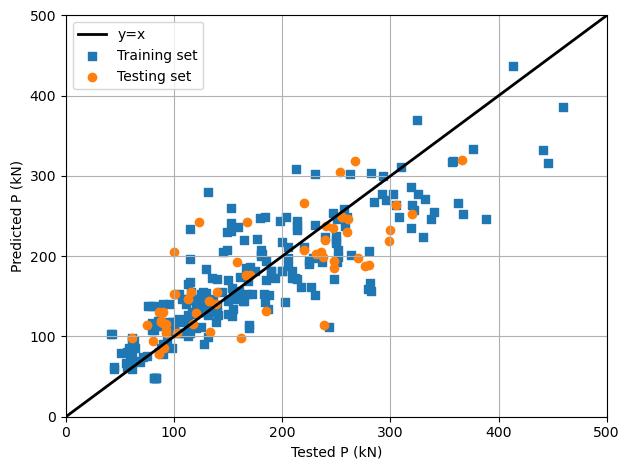

In [24]:
xx = np.linspace(0, 900, 100)
yy = xx

plt.figure()
plt.plot(xx, yy, c='k', linewidth=2)
plt.scatter(y_train, y_pred1, marker='s')
plt.scatter(y_test, y_pred2, marker='o')

plt.grid()
plt.legend(['y=x', 'Training set', 'Testing set'], loc = 'upper left')
plt.tick_params (axis = 'both', which = 'major')
plt.axis('tight')
plt.xlabel('Tested P (kN)')
plt.ylabel('Predicted P (kN)')
plt.xlim([0, 500])
plt.ylim([0, 500])

plt.tight_layout()

In [ ]:
from keras.models import Model

hidden_layer_output = model.layers[1].output

feature_extractor_model = Model(inputs=model.input, outputs=hidden_layer_output)


In [ ]:
# 加载模型  
layer3 = feature_extractor_model

In [ ]:
dataset = pd.read_excel('xiushide大于150 - 副本.xlsx', sheet_name='Sheet1')
dataset.head()
print(dataset.shape)

(76, 17)


In [ ]:
b = dataset.loc[:, 'b']
d = dataset.loc[:, 'd']
ad = dataset.loc[:, 'a/d']
Asv = dataset.loc[:, 'Asv']
fc = dataset.loc[:, 'fc']
hf = dataset.loc[:, 'hf']
ntf = dataset.loc[:, 'ntf']
Ef = dataset.loc[:, 'Ef']
ffrp = dataset.loc[:, 'ffrp']
frpws = dataset.loc[:, 'frpws']
xiushi = dataset.loc[:, 'xiushi']
wfsf = dataset.loc[:, 'wf/sf']

In [ ]:
X = np.zeros(shape=(76,11))
X[:, 0] = b
X[:, 1] = d
X[:, 2] = ad
X[:, 3] = Asv
X[:, 4] = fc
X[:, 5] = hf
X[:, 6] = ntf
X[:, 7] = Ef
X[:, 8] = ffrp
X[:, 9] = frpws
X[:, 10] = wfsf

# 创建名字数组，包含12个列名
names = np.array(['b', 'd', 'ad', 'Asv', 'fc', 'hf', 'ntf', 'Ef', 'ffrp', 'frpws', 'wfsf'])

print(X.shape)

(76, 11)


In [ ]:
X=scaler1.transform(X)
print(X)
print(X.shape)

[[0.625      0.69875776 0.3968254  0.31914591 0.19397836 0.67264574
  0.         0.10989011 0.49418605 1.         1.        ]
 [0.625      0.69875776 0.3968254  0.31914591 0.19397836 0.67264574
  0.         0.10989011 0.49418605 1.         1.        ]
 [0.625      0.69875776 0.3968254  0.31914591 0.19397836 0.67264574
  0.         0.10989011 0.49418605 1.         1.        ]
 [0.625      0.69875776 0.3968254  0.31914591 0.19397836 0.67264574
  0.         0.10989011 0.49418605 1.         1.        ]
 [0.625      0.69875776 0.3968254  0.31914591 0.19397836 0.67264574
  0.         0.10989011 0.49418605 1.         1.        ]
 [0.625      0.69875776 0.3968254  0.31914591 0.19397836 0.67264574
  0.         0.10989011 0.49418605 0.5        1.        ]
 [0.625      0.69875776 0.3968254  0.31914591 0.19397836 0.67264574
  0.         0.10989011 0.49418605 0.5        1.        ]
 [0.625      0.69875776 0.3968254  0.31914591 0.19397836 0.67264574
  0.         0.10989011 0.49418605 0.5        1.  

In [ ]:
y = dataset.loc [:, 'V']

print(y.shape)

(76,)


In [ ]:
layer3X =layer3.predict(X)
print(layer3X.shape)

3/3 [==============================] - 0s 2ms/step
(76, 12)


In [ ]:
xiushi = dataset.loc[:, 'xiushi'].values.reshape(-1, 1)
X = np.hstack((layer3X, xiushi))
print(X.shape)
print(X)

(76, 13)
[[ 0.          0.         33.95225143 18.91648865 15.5424242  28.09383965
  31.62944221  0.          0.          0.         24.54020882  0.
   0.        ]
 [ 0.          0.         33.95225143 18.91648865 15.5424242  28.09383965
  31.62944221  0.          0.          0.         24.54020882  0.
  10.        ]
 [ 0.          0.         33.95225143 18.91648865 15.5424242  28.09383965
  31.62944221  0.          0.          0.         24.54020882  0.
  20.        ]
 [ 0.          0.         33.95225143 18.91648865 15.5424242  28.09383965
  31.62944221  0.          0.          0.         24.54020882  0.
  30.        ]
 [ 0.          0.         33.95225143 18.91648865 15.5424242  28.09383965
  31.62944221  0.          0.          0.         24.54020882  0.
  40.        ]
 [ 0.          0.         33.49936295 19.16597748 16.27252197 27.81976318
  31.20769119  0.          0.          0.         24.34817696  0.
   0.        ]
 [ 0.          0.         33.49936295 19.16597748 16.27252197

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(X_train.shape)

(53, 13)


In [ ]:
import xgboost as xgb
# 创建XGBoost回归模型
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    nthread=8,
    n_estimators=200,
    subsample=0.6,
    colsample_bytree=0.8
)

# 定义要搜索的参数网格
param_dict = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9],  # 减小搜索范围，避免过深
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # 增加更小的学习率
    'gamma': [0, 0.1, 0.2, 0.3],  # 添加0值，允许无正则化
    'reg_alpha': [0, 0.1, 0.5, 1],  # L1正则化
    'reg_lambda': [0, 0.1, 0.5, 1],  # L2正则化
    'subsample': [0.6, 0.7, 0.8, 0.9],  # 增加更多选项
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]  # 列采样比例
}

# 定义K折交叉验证
kfold = KFold(n_splits=5, shuffle=True, random_state=36)  # 固定随机状态以确保结果可复现

# 创建GridSearchCV对象
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_dict,
    cv=kfold,
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=2  # 根据CPU核心数调整
)

# 执行网格搜索
grid_result = grid_search.fit(X_train, y_train)

# 输出最佳结果
print(f"最佳MSE分数: {-grid_result.best_score_:.4f}")
print(f"最佳参数组合: {grid_result.best_params_}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
最佳MSE分数: 1284.8982
最佳参数组合: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 3, 'reg_alpha': 1, 'reg_lambda': 1, 'subsample': 0.6}


In [ ]:
regr_1 = grid_result.best_estimator_

In [ ]:
regr_1.fit(X_train, y_train)

Z1 = regr_1.predict(X_train)
Z2 = regr_1.predict(X_test)
Z3 = regr_1.predict(X)

def mape(y_train, Z1):    
    return np.mean(np.abs((Z1 - y_train) / y_train))
print("XGBR Training R2:", r2_score(y_train, Z1), "RMSE:", np.sqrt(mean_squared_error(y_train, Z1)), "MAE:", mean_absolute_error(y_train, Z1),"MAPE:",mape(y_train, Z1))

def mape(y_test, Z2):    
    return np.mean(np.abs((Z2 - y_test) / y_test))
print("XGBR Testing R2:", r2_score(y_test, Z2), "RMSE:", np.sqrt(mean_squared_error(y_test, Z2)), "MAE:", mean_absolute_error(y_test, Z2),"MAPE:",mape(y_test, Z2))

def mape(y, Z3):    
    return np.mean(np.abs((Z3 - y) / y))
print("XGBR ALL R2:", r2_score(y, Z3), "RMSE:", np.sqrt(mean_squared_error(y, Z3)), "MAE:", mean_absolute_error(y, Z3),"MAPE:",mape(y, Z3))

XGBR Training R2: 0.9724403151105458 RMSE: 11.397911976237427 MAE: 8.302622934017542 MAPE: 0.03904250271900716
XGBR Testing R2: 0.876379728681146 RMSE: 26.832073889454747 MAE: 19.714944099757982 MAPE: 0.12759235855998166
XGBR ALL R2: 0.9390507883266497 RMSE: 17.56358426694865 MAE: 11.756351707860045 MAPE: 0.06584048540772314


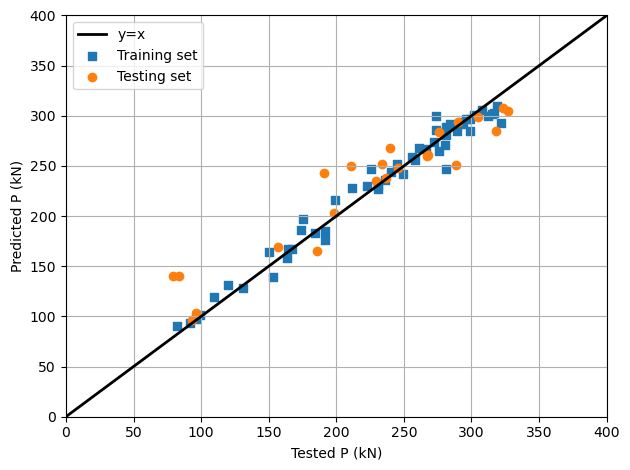

In [ ]:
xx = np.linspace(0, 900, 100)
yy = xx

plt.figure()
plt.plot(xx, yy, c='k', linewidth=2)
plt.scatter(y_train, Z1, marker='s')
plt.scatter(y_test, Z2, marker='o')

plt.grid()
plt.legend(['y=x', 'Training set', 'Testing set'], loc = 'upper left')
plt.tick_params (axis = 'both', which = 'major')
plt.axis('tight')
plt.xlabel('Tested P (kN)')
plt.ylabel('Predicted P (kN)')
plt.xlim([0, 400])
plt.ylim([0, 400])

plt.tight_layout()